In [3]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
import myfunctions as mf

# 1-D Model File Parameters

In [7]:
head = "/exports/csce/datastore/geos/users/s1215319/paper3/version2/1dfiles/o2_lifetimes/"

### Standard Photochemistry Directory
stnd = "standard/"
### Accelerated CH4 Directory
fast = "fastfloor_diurnal"

### Solar Longitudes to Plot
ls_study = [0,45,90,135,180,225,270,315,71,251,345]

### CH4 Lifetime's studied
## Lifetimes of CH4 below layer 5 in the model 
enhancements = ['15min', '30min', 'hr', '2hr', '3hr', '4hr', '5hr', '6hr', '12hr', '24hr', 'week' ,'month' ,'6month', 'year']
enhancement_labels =['15 min.', '30 min.', '1 Hour',\
                    '2 Hours', '3 Hours', '4 Hours',\
                    '5 Hours', '6 Hours', '12 Hours', '1 Day',\
                    '1 Week', '1 Month', '6 Months', '1 Year']

# Curiosity Data

In [8]:
##################
## O2 Data Reading
##################
curi_dir = "/exports/csce/datastore/geos/users/s1215319/paper3/h2o2_effects/curiosity_comparisons/curiosity_data/"

curi_o2_file = open(curi_dir+"trainer_table_S1.txt","r")
curi_o2_lines = curi_o2_file.readlines()[6:] # 6: trims the text header 

curi_o2 = []
curi_ls = []
err_o2_pos = []
err_o2_neg = []

for line in curi_o2_lines:
    ls_curi = float(line.split()[0])
    o2_curi = float(line.split()[10])
    o2_er_pos = float(line.split()[11])
    o2_er_neg = float(line.split()[12])

    curi_o2.append(o2_curi)
    curi_ls.append(ls_curi)
    err_o2_pos.append(o2_er_pos)
    err_o2_neg.append(o2_er_neg)
    
    if ( np.ceil(ls_curi) == 345 ):
        relo2_rover = np.float(o2_curi)
        print(relo2_rover, o2_er_pos, o2_er_neg)


yerr_real = [[],[]]
## Propogation of Errors
## for relative VMR plot
## ---------------------
yerr=[[],[]]
for a in range(0,np.size(err_o2_pos)):
    yerr[0].append(\
                   np.sqrt(\
                          (err_o2_pos[a]/curi_o2[a])**2. \
                    + (3.e-5/0.00153)**2.
                          )\
                  )
    
    yerr[1].append(\
                   np.sqrt(\
                          (err_o2_neg[a]/curi_o2[a])**2. \
                    + (0.00014/0.00153)**2.
                          )\
                  )
    
    yerr_real[0].append(np.float(err_o2_pos[a]))
    yerr_real[1].append(np.float(err_o2_neg[a]))



0.00153 3e-05 0.00014


# Plotting Script

5.8717015082553056e-15
2.304277916479608e-15
3.6178365081662955e-15
7.465150278900916e-15
1.2644510547117626e-14
8.012712130085754e-15
4.605169959924724e-15
5.4423240183840615e-15
2.660948582788522e-15
5.8324886261819366e-15
5.354627422160761e-15
odict_keys(['Time', 'controle', 'rlonu', 'latitude', 'longitude', 'altitude', 'rlatv', 'aps', 'bps', 'ap', 'bp', 'soildepth', 'cu', 'cv', 'aire', 'phisinit', 'surfdust', 'surfice', 'o=o_loss_rate', 'ch4_loss_rate', 'ch4_tau', 'steady_o2', 'o2_nd', 'zls', 'tauref', 'sza', 'mmean', 'pplay', 'pplev', 'ps', 'temp', 'co2_col', 'co2', 'co_col', 'co', 'o_col', 'o', 'o1d_col', 'o1d', 'o2_col', 'o2', 'o3_col', 'o3', 'h_col', 'h', 'h2_col', 'h2', 'oh_col', 'oh', 'ho2_col', 'ho2', 'h2o2_col', 'h2o2', 'n2_col', 'n2', 'ar_col', 'ar', 'h2o_ice_col', 'h2o_ice', 'h2o_vap_col', 'h2o_vap', 'ch4_col', 'ch4', 'ch3_col', 'ch3', 'ch3o2_col', 'ch3o2', 'ch3ooh_col', 'ch3ooh', 'ch3oh_col', 'ch3oh', 'ch3o_col', 'ch3o', 'hcho_col', 'hcho', 'hcooh_col', 'hcooh', 'hoch2o2

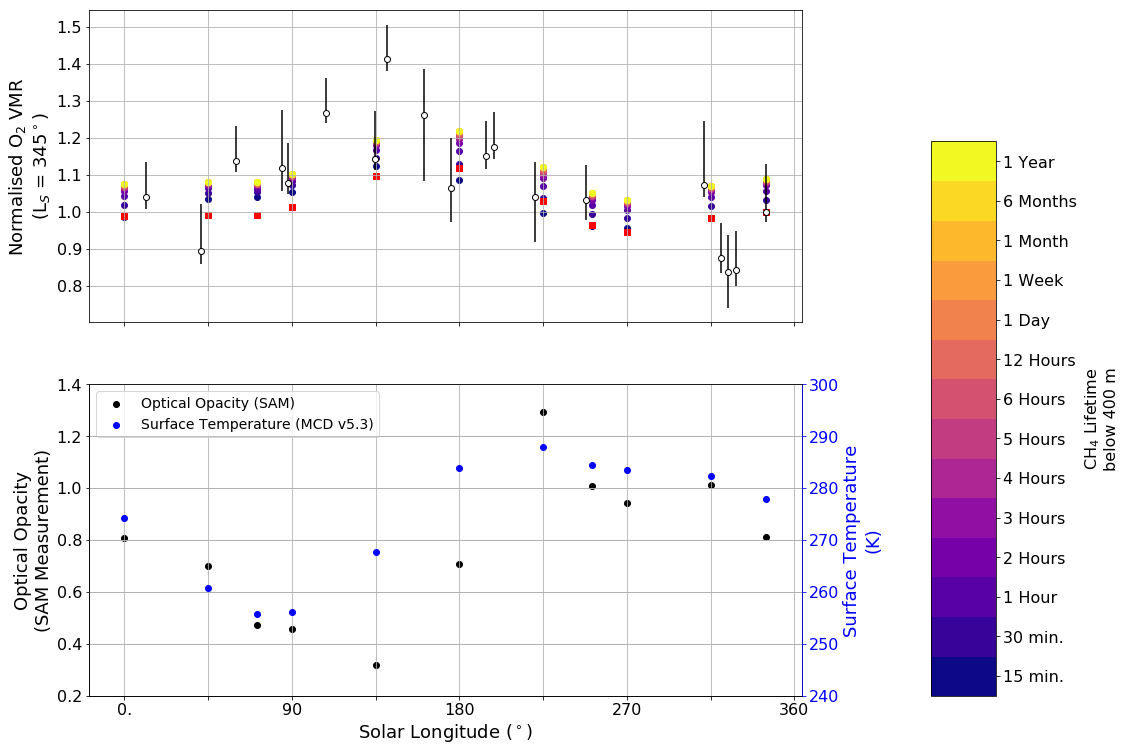

In [9]:
### Assumed CH4 lifetime at LS 345 in the
### accelerated runs 
### enhancements = ['30min', 'hr', '2hr', '3hr', '4hr',
###                 '5hr', '6hr', '12hr', '24hr', 'week']
tau_at_ls345 = '15min'

### Figure Constructions
fig,axs=plt.subplots(2,sharex=True,sharey=False)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.grid'] = True

fig.set_figheight(14)
fig.set_figwidth(18)
    
#### Colormap for methane lifetime values
cmap = plt.get_cmap("plasma", len(enhancements))
norm = matplotlib.colors.BoundaryNorm(np.arange(len(enhancements)+1),len(enhancements))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([]) 

### Place Colormap
fig.subplots_adjust(right=0.75,left=0.2,wspace=0.4,bottom=0.2)
cbar_ax = fig.add_axes([0.85, 0.2, 0.05, 0.55])
cb=fig.colorbar(sm, cax=cbar_ax)
cb.ax.set_ylabel("CH$_4$ Lifetime\nbelow 400 m",fontsize=16)
cb.set_ticks(np.arange(0.5,14.5,1))
cb.set_ticklabels(enhancement_labels)

######################
## 1-D Model at LS=345
######################

### ------------------
### Standard Chemistry 
### ------------------
ncdf_ctrl_345 = Dataset(head+stnd + "5s_345Ls.nc","r")
## Noon Index
sza = ncdf_ctrl_345.variables['sza'][:48]
i = np.where(sza==np.min(sza))[0][0] + 48*2

o2_345_C =ncdf_ctrl_345.variables['steady_o2'][i,0]

label1D = "Standard Chemistry\n(1-D Model)"

### -------------------------
### Accelerated CH4 Chemistry
### -------------------------
ncdf_345 = Dataset(head+fast + "/Ls_345/5s_345Ls_" + tau_at_ls345 + ".nc","r")
o2_345 = ncdf_345.variables['steady_o2'][i,0]


############################
## Loop One: Solar Longitude
############################
ax0lab="Optical Opacity (SAM)"
for ls in ls_study:
    
    ### Subdirectory in the 
    ### accelerated CH4 directory
    subdir = "Ls_" + str(ls) 
    
    ### Standard Chemistry file
    ncdf_ctrl = Dataset(head+stnd + "5s_" + str(ls) + "Ls.nc","r")
    
    ### Solar Zenith Angle
    sza = ncdf_ctrl.variables['sza'][:48]
    i = np.where(sza==np.min(sza))[0][0] + 48*2

    
    ### ch3ooh
    ch3ooh = ncdf_ctrl.variables['ch3ooh'][i,0]*ncdf_ctrl.variables['mmean'][i,0]/mf.mmol['hcho']
    print(ch3ooh)
    
    
    ### Standard Chemistry O2 relative to Ls 345
    o2c = ncdf_ctrl.variables['steady_o2'][i,0]/o2_345_C
            
    tauoptical = ncdf_ctrl.variables['tauref'][i]
    
    axs[1].scatter(ls,tauoptical,color='k',label=ax0lab)
    ax0lab=None
    ######################################
    ### Loop 2: Methane Chemical Lifetimes
    ######################################
    x=0
    for ch4tau in enhancements:
        
        color = cmap(x)
    
        ncdf = Dataset(head+fast+"/"+subdir+"/5s_"+str(ls)+"Ls_" + ch4tau + ".nc", "r")
        o2 = ncdf.variables['steady_o2'][i,0]/o2_345
        
        axs[0].scatter(ls,o2,color=color)
        
        x=x+1
        
    ### Plot last to bring forward on plot
    axs[0].scatter(ls,o2c,marker='s',color='r',label=label1D)
    label1D=None

    
print(ncdf.variables.keys())
#####################
## Curiosity
#####################
axs[0].errorbar(np.array(curi_ls),np.array(curi_o2)/0.00153,\
             yerr=yerr,\
             linestyle='None',color='k',marker='o', mfc='w',label='SAM O$_2$\nObservation')

### Formatting

## Labels
axs[0].set_ylabel("Normalised O$_2$ VMR\n(L$_S$ = 345$^\circ$)")
axs[1].set_ylabel("Optical Opacity\n(SAM Measurement)")

axs[1].set_xlabel("Solar Longitude ($^\circ$)")

## Limits
axs[1].set_ylim(0.2,1.4)

## Ticks
# axs[0].set_xticks([0.,90.,180.,270.,360.])
axs[0].set_xticks([0.,45.,90.,135.,180.,225.,270.,315.,360.])
axs[0].set_xticklabels(['0.','','90','','180','', '270','','360'])

## MCD v5.3 Surface Temperatures
mcd_surfT = [274.27, 260.77, 256.14, 267.66, 283.95,\
             287.976,283.538, 282.32,255.819,284.487,277.988]

fluxplot = axs[1].twinx()
fluxplot.scatter(ls_study,mcd_surfT,color='b',label='Surface Temperature (MCD v5.3)') 
fluxplot.spines['right'].set_color('b')
fluxplot.tick_params(axis='y', colors='blue')
fluxplot.set_ylabel("Surface Temperature\n(K)")
fluxplot.yaxis.label.set_color('blue')

fluxplot.set_ylim(240.,300.)

#####################
## Legend
#####################
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(0.87, 0.82), loc='center', fontsize = 16)

handles_1, labels_1 = fluxplot.get_legend_handles_labels()
handles, labels = axs[1].get_legend_handles_labels()

handles.append(handles_1[0])
labels.append(labels_1[0])

axs[1].legend(handles,labels)

In [32]:
fig.savefig("/exports/csce/datastore/geos/users/s1215319/paper3/version2/figures/FIG3_O2cycle_" + fast + ".png",dpi=500)